<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ec_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuaciones de una variable:

Para los siguiente problemas:


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.



3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.



5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.


```

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```


In [1]:
#Librerias
import numpy as np
import matplotlib.pylab as plt
from scipy import optimize
import pandas as pd

***Punto 1***

In [ ]:
th = lambda x: x - np.sin(x) - np.pi/2
x = np.arange(0,2*np.pi,0.01)
y = th(x)

In [ ]:
d = {'Theta':x,'Funcion':y}
df = pd.DataFrame(d)
df

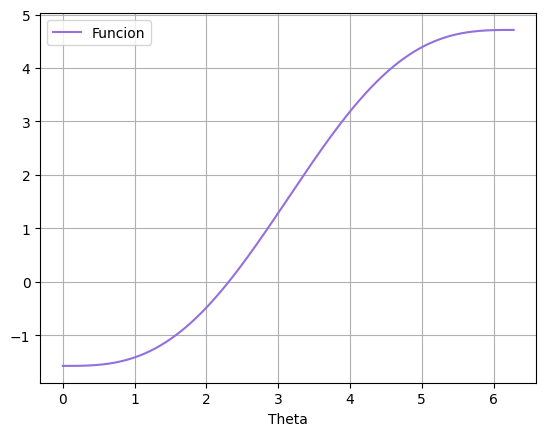

In [ ]:
df.plot.line(x='Theta',y='Funcion',color='mediumpurple')
plt.grid(True)
plt.show()

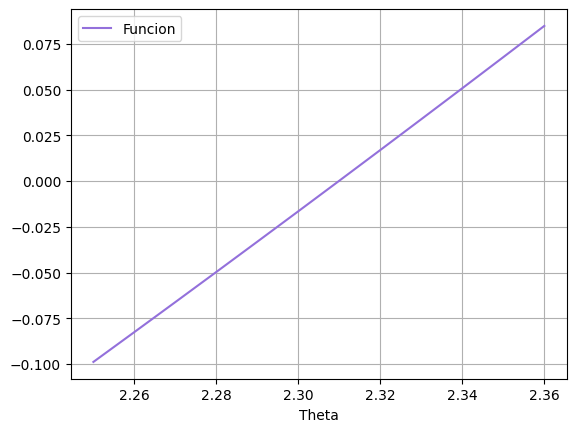

In [ ]:
filter = df[df.Funcion.between(-0.1,0.1)] #se escoje la columna del dataframe y un intervalo para hacer "zoom"
filter.plot.line(x='Theta',y='Funcion',color='mediumpurple')
plt.grid()
plt.show()

In [ ]:
#metodo biseccion
root = optimize.bisect(th,2.30,2.31) #funcion y dos escalares con dif signo
root

2.3098814600089104

In [ ]:
#metodo newton
dth = lambda x: 1 - np.cos(x)
raiz = optimize.newton(th,2.30,dth) #funcion, escalay y derivada
raiz

2.309881460010057

In [ ]:
#punto fijo
punto = lambda x: x-th(x) #punto menos la funcion evaluada en ese punto
root_point = optimize.fixed_point(punto,2.30)
root_point

array(2.30988146)

In [ ]:
#secante
dth = lambda x: 1 - np.cos(x)
raiz = optimize.newton(th,2.30) #igual que newton sin derivada.
raiz

2.3098814600100575

***Punto 2***

In [ ]:
#Caida de un objeto

#Parametros
s0 = 300 #ft
m = 0.25 #lb
k = 0.1 #lbs/ft
g = 32.17 #ft/s²

st = lambda x: s0 - (m*g/k)*x + ((m**2)*g/k)*x *(1-np.exp(-k*x/m))
#x = tiempo
x = np.arange(1,5,0.01)
#y = altura
y = st(x)

In [ ]:
t = {'Tiempo':x,'Funcion':y}
dt = pd.DataFrame(t)
dt

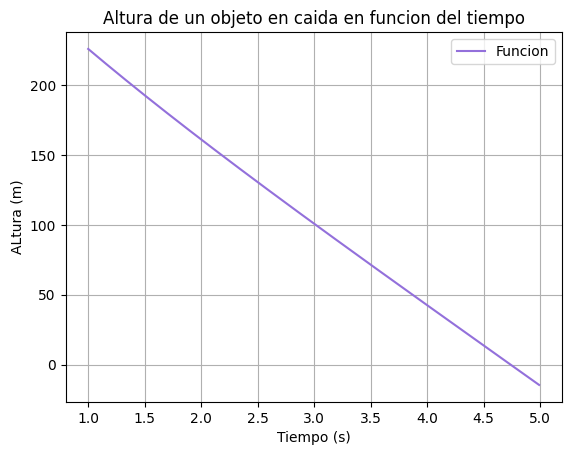

In [ ]:
dt.plot.line(x='Tiempo',y='Funcion',color='mediumpurple')
plt.title('Altura de un objeto en caida en funcion del tiempo')
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('ALtura (m)')
plt.show()

In [ ]:
#metodo biseccion
flor = optimize.bisect(st,2.5,10.0) #funcion y dos escalares con dif signo
flor

4.736139137605164

In [ ]:
#punto fijo
point = lambda x: x-st(x) #punto menos la funcion evaluada en ese punto
r_point = optimize.fixed_point(point,4.7)
r_point

array(4.73613914)

In [ ]:
#metodo newton
dst = lambda x: 1 - np.cos(x)
raiz = optimize.newton(st,2.30,dst) #funcion, escalay y derivada
raiz

In [ ]:
#metodo secante
ds = lambda x: 1 - np.cos(x)
raiz = optimize.newton(st,2.30) #igual que newton sin derivada.
raiz

4.736139137603489

***Punto 3***

In [11]:
#Magnetizacion como funcion de la temperatura
m = 0.1
Temp = np.linspace(0.1,0.99,100)
def magnet(T,m,epsilon,N):
  m1 = m
  for i in range(N):
    m2 = np.tanh(m1/T)
    if abs(m2-m1) < epsilon:
      return m2
    m1 = m2

T = 0.5
N = 100
epsilon = 1e-6
#mT = lambda x: np.tanh((m)/x)
magnet(T,m,epsilon,N)


0.9575039460401423

In [7]:
#Magnetizacion como funcion de la temperatura
m = 0.1
Temp = np.linspace(0.1,0.99,100)
def magnet(T,m):
  return np.tanh((m)/T)

In [8]:
Temp = np.linspace(0.1,0.99,100)
mt= magnet(Temp,m)
mt

array([0.76159416, 0.72472029, 0.68981501, 0.65704132, 0.62642634,
       0.59791484, 0.57140487, 0.54677067, 0.52387716, 0.50258877,
       0.48277456, 0.4643111 , 0.44708378, 0.43098726, 0.41592539,
       0.40181075, 0.38856413, 0.3761138 , 0.36439492, 0.35334882,
       0.34292247, 0.33306782, 0.32374137, 0.31490364, 0.30651879,
       0.2985542 , 0.2909802 , 0.28376972, 0.27689801, 0.27034248,
       0.2640824 , 0.25809878, 0.25237415, 0.24689247, 0.24163893,
       0.2365999 , 0.23176278, 0.22711589, 0.22264846, 0.21835047,
       0.21421261, 0.21022627, 0.20638338, 0.20267647, 0.19909855,
       0.1956431 , 0.19230401, 0.18907559, 0.18595249, 0.1829297 ,
       0.18000252, 0.17716654, 0.17441761, 0.17175182, 0.1691655 ,
       0.16665518, 0.16421758, 0.16184963, 0.15954841, 0.15731116,
       0.15513527, 0.15301828, 0.15095784, 0.14895173, 0.14699786,
       0.14509421, 0.1432389 , 0.14143012, 0.13966614, 0.13794535,
       0.13626617, 0.13462714, 0.13302683, 0.13146389, 0.12993

In [ ]:
#metodo secante
#ma = optimize.newton(mT,0.5) #igual que newton sin derivada.